# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import decimal
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


# Compine all the files in one dataframe

In [2]:
folder_name = "SalesData"
folder_path = os.path.join(os.getcwd(), folder_name)
print(folder_path)

C:\Users\USER\SalesData


In [3]:
folder_path = r'C:\Users\USER\SalesData'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [4]:
combined_df = pd.DataFrame()

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [5]:
combined_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001"
5,171659,Bose SoundSport Headphones,1,99.99,04/18/20 18:16,"47 Lakeview St, Dallas, TX 75001"
6,171660,Wired Headphones,1,11.99,04/08/20 12:24,"210 2nd St, Boston, MA 02215"
7,171661,20in Monitor,1,109.99,04/13/20 10:56,"673 Park St, Austin, TX 73301"
8,171662,iPhone,1,700.0,04/07/20 20:46,"976 Washington St, Los Angeles, CA 90001"
9,171663,AAA Batteries (4-pack),4,2.99,04/21/20 09:07,"378 Jefferson St, San Francisco, CA 94016"


# Data Cleaning

In [6]:
combined_df.shape


(368935, 6)

In [7]:
combined_df.info(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368935 entries, 0 to 368934
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          367857 non-null  object
 1   Product           367857 non-null  object
 2   Quantity Ordered  367857 non-null  object
 3   Price Each        367857 non-null  object
 4   Order Date        367857 non-null  object
 5   Purchase Address  367857 non-null  object
dtypes: object(6)
memory usage: 16.9+ MB


In [8]:
combined_df.isnull().sum()

Order ID            1078
Product             1078
Quantity Ordered    1078
Price Each          1078
Order Date          1078
Purchase Address    1078
dtype: int64

In [9]:
#As the Null values are very low compared to the numbers of records, the best approach is to drop them 
combined_df=combined_df.dropna()
combined_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
combined_df.duplicated().sum()

1126

In [11]:
#As the duplicated values are very low compared to the numbers of records, the best approach is to drop them 
combined_df=combined_df.drop_duplicates()
combined_df.duplicated().sum()

0

In [12]:
data_types = combined_df.dtypes
print(data_types)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [13]:
combined_df['Order ID'] = pd.to_numeric(combined_df['Order ID'], errors='coerce')
combined_df.dropna(subset=['Order ID'], inplace=True)
combined_df['Order ID'] = combined_df['Order ID'].astype(int)

In [14]:
# Convert "Order ID" to int
combined_df['Order ID'] = combined_df['Order ID'].astype(int)

# Convert "Quantity Ordered" to int
combined_df['Quantity Ordered'] = combined_df['Quantity Ordered'].astype(int)

# Convert "Price Each" to float
combined_df['Price Each'] = combined_df['Price Each'].astype(float)

In [15]:
data_types = combined_df.dtypes
print(data_types)

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


In [16]:
combined_df.shape

(366730, 6)

# Explatory Data Analysis (EDA)

In [17]:
# Summary statistics
combined_df.describe()

,Order ID,Quantity Ordered,Price Each
count,366730.000000,366730.000000,366730.000000
mean,229659.800245,1.126578,185.579171
std,51420.771539,0.446751,334.886077
min,141234.000000,1.000000,2.990000
25%,185309.000000,1.000000,11.950000
50%,229350.500000,1.000000,14.950000
75%,273364.000000,1.000000,150.000000
max,328211.000000,9.000000,1700.000000


In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366730 entries, 0 to 368934
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          366730 non-null  int32  
 1   Product           366730 non-null  object 
 2   Quantity Ordered  366730 non-null  int32  
 3   Price Each        366730 non-null  float64
 4   Order Date        366730 non-null  object 
 5   Purchase Address  366730 non-null  object 
dtypes: float64(1), int32(2), object(3)
memory usage: 16.8+ MB


In [19]:
# Initialize empty lists to store the results
column_names = []
unique_counts = []
unique_values_list = []

# Loop through each column in the original DataFrame
for col in combined_df.columns:
    unique_values = combined_df[col].unique()
    count_unique = combined_df[col].nunique()
    column_names.append(col)
    unique_counts.append(count_unique)
    unique_values_list.append(str(unique_values))  # Convert to string for easier storage and visualization

# Create a new DataFrame to store the above information
unique_info_df = pd.DataFrame({
    'Column_Name': column_names,
    'Unique_Count': unique_counts,
    'Unique_Values': unique_values_list
})

# Show the resulting DataFrame
unique_info_df

,Column_Name,Unique_Count,Unique_Values
0,Order ID,186978,[171654 171655 171656 ... 250345 250346 250347]
1,Product,19,['USB-C Charging Cable' 'Wired Headphones' 'Bo...
2,Quantity Ordered,9,[1 2 4 3 5 6 7 8 9]
3,Price Each,17,[ 11.95 11.99 99.99 2.99 109.99 700....
4,Order Date,278330,['04/22/20 22:27' '04/02/20 15:14' '04/30/20 2...
5,Purchase Address,228275,"['784 Pine St, Los Angeles, CA 90001' '513 Nor..."


# Applying Measure of Central Tendency

In [20]:
numeric_columns = ['Quantity Ordered', 'Price Each']

# Calculate the mean, median, and mode for each numeric column
central_tendency = {
    'Column': [],
    'Mean': [],
    'Median': [],
    'Mode': []
}

for column in numeric_columns:
    central_tendency['Column'].append(column)
    central_tendency['Mean'].append(combined_df[column].mean())
    central_tendency['Median'].append(combined_df[column].median())
    central_tendency['Mode'].append(combined_df[column].mode().values[0])

# Create a DataFrame to display the results
central_tendency_df = pd.DataFrame(central_tendency)

# Print or display the central tendency DataFrame
print(central_tendency_df)

             Column        Mean  Median   Mode
0  Quantity Ordered    1.126578    1.00   1.00
1        Price Each  185.579171   14.95  11.95


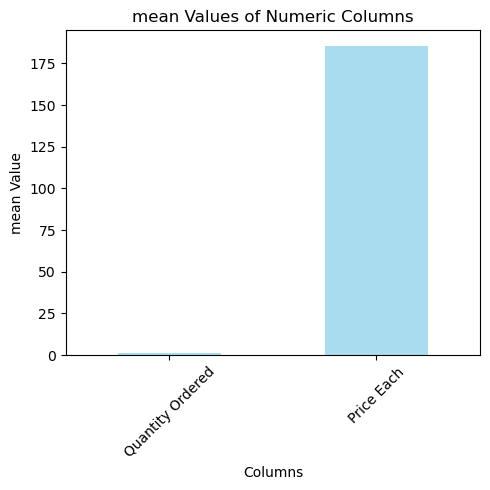

In [21]:
import matplotlib.pyplot as plt
numeric_columns = ['Quantity Ordered', 'Price Each']
# Calculate the mean values for each column
means = combined_df[numeric_columns].mean()

# Create a bar plot
plt.figure(figsize=(5, 5))  # Set the figure size
means.plot(kind='bar', color='skyblue', alpha=0.7) 
plt.title('mean Values of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('mean Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

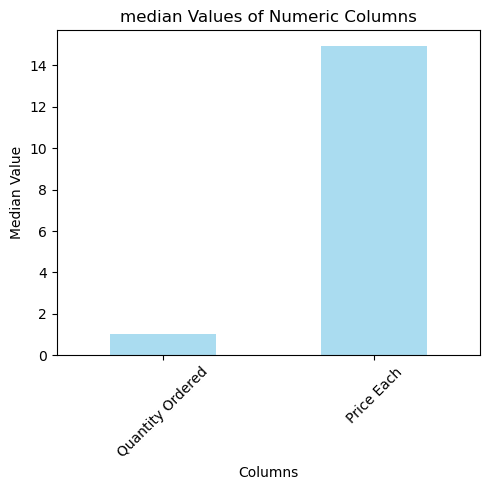

In [22]:

numeric_columns = ['Quantity Ordered', 'Price Each']
# Calculate the mean values for each column
medians = combined_df[numeric_columns].median()

# Create a bar plot
plt.figure(figsize=(5, 5))  # Set the figure size
medians.plot(kind='bar', color='skyblue', alpha=0.7) 
plt.title('median Values of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Median Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

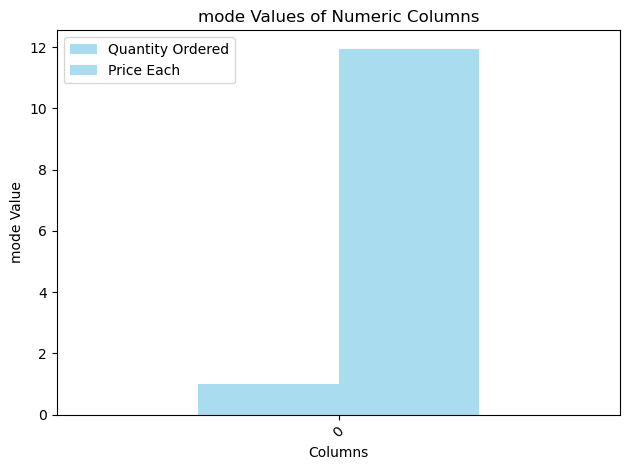

In [23]:
numeric_columns = ['Quantity Ordered', 'Price Each']
# Calculate the mean values for each column
modes = combined_df[numeric_columns].mode()

# Create a bar plot
plt.figure(figsize=(5, 5))  # Set the figure size
modes.plot(kind='bar', color='skyblue', alpha=0.7) 
plt.title('mode Values of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('mode Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Applying Measure of Dispersion

In [24]:
numeric_columns = ['Quantity Ordered', 'Price Each']

for column in numeric_columns:
    # Range
    range_value = combined_df[column].max() - combined_df[column].min()

    # Variance
    variance_value = combined_df[column].var()

    # Standard Deviation
    std_deviation_value = combined_df[column].std()

    # Interquartile Range (IQR)
    iqr_value = combined_df[column].quantile(0.75) - combined_df[column].quantile(0.25)

    # Print or use these values as needed
    print(f"Column: {column}")
    print(f"Range: {range_value}")
    print(f"Variance: {variance_value}")
    print(f"Standard Deviation: {std_deviation_value}")
    print(f"IQR: {iqr_value}")
    print()

Column: Quantity Ordered
Range: 8
Variance: 0.19958673271957428
Standard Deviation: 0.4467513097010173
IQR: 0.0

Column: Price Each
Range: 1697.01
Variance: 112148.68446141083
Standard Deviation: 334.8860768401858
IQR: 138.05



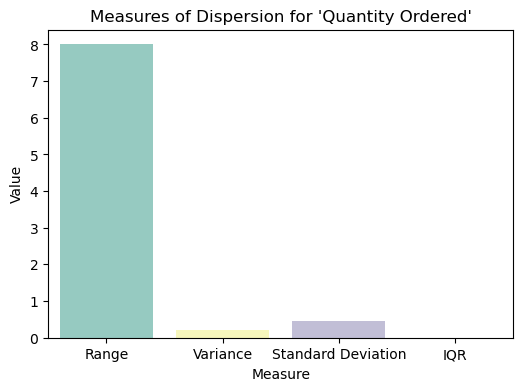

In [25]:
column_to_visualize = 'Quantity Ordered'

# Calculate dispersion measures for the selected column
range_value = combined_df[column_to_visualize].max() - combined_df[column_to_visualize].min()
variance_value = combined_df[column_to_visualize].var()
std_deviation_value = combined_df[column_to_visualize].std()
iqr_value = combined_df[column_to_visualize].quantile(0.75) - combined_df[column_to_visualize].quantile(0.25)

# Create a DataFrame for the selected column
column_data = pd.DataFrame({
    'Measure': ['Range', 'Variance', 'Standard Deviation', 'IQR'],
    'Value': [range_value, variance_value, std_deviation_value, iqr_value]
})

# Create a bar plot for the selected column
plt.figure(figsize=(6, 4))
sns.barplot(data=column_data, x='Measure', y='Value', palette='Set3')
plt.title(f"Measures of Dispersion for '{column_to_visualize}'")
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

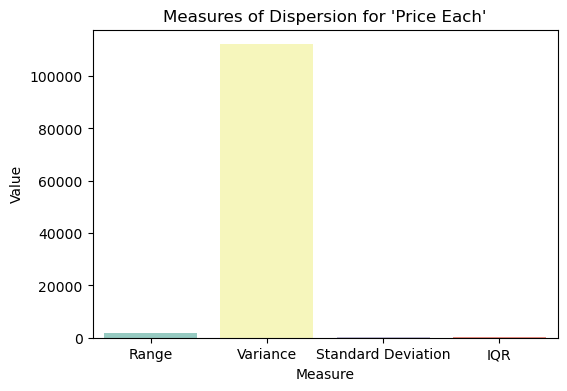

In [26]:
column_to_visualize = 'Price Each'

# Calculate dispersion measures for the selected column
range_value = combined_df[column_to_visualize].max() - combined_df[column_to_visualize].min()
variance_value = combined_df[column_to_visualize].var()
std_deviation_value = combined_df[column_to_visualize].std()
iqr_value = combined_df[column_to_visualize].quantile(0.75) - combined_df[column_to_visualize].quantile(0.25)

# Create a DataFrame for the selected column
column_data = pd.DataFrame({
    'Measure': ['Range', 'Variance', 'Standard Deviation', 'IQR'],
    'Value': [range_value, variance_value, std_deviation_value, iqr_value]
})

# Create a bar plot for the selected column
plt.figure(figsize=(6, 4))
sns.barplot(data=column_data, x='Measure', y='Value', palette='Set3')
plt.title(f"Measures of Dispersion for '{column_to_visualize}'")
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

# Applying Measure of Frequency

In [27]:
column_to_analyze = 'Product'

# Calculate the frequency of unique values in the selected column
value_counts = combined_df[column_to_analyze].value_counts(normalize=True).sort_values(ascending=False)

# Display the frequency counts
print(value_counts)

Product
USB-C Charging Cable          0.118076
Lightning Charging Cable      0.115676
AAA Batteries (4-pack)        0.111191
AA Batteries (4-pack)         0.111191
Wired Headphones              0.101014
Apple Airpods Headphones      0.083203
Bose SoundSport Headphones    0.071549
27in FHD Monitor              0.040515
iPhone                        0.037431
34in Ultrawide Monitor        0.033144
27in 4K Gaming Monitor        0.032779
Google Phone                  0.029679
Macbook Pro Laptop            0.025954
Flatscreen TV                 0.025883
ThinkPad Laptop               0.022229
20in Monitor                  0.022027
Vareebadd Phone               0.011218
LG Dryer                      0.003621
LG Washing Machine            0.003621
Name: proportion, dtype: float64


# Convert Order Date column to Datetime formate

In [28]:
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], format='%m/%d/%y %H:%M')


#As SQL Query

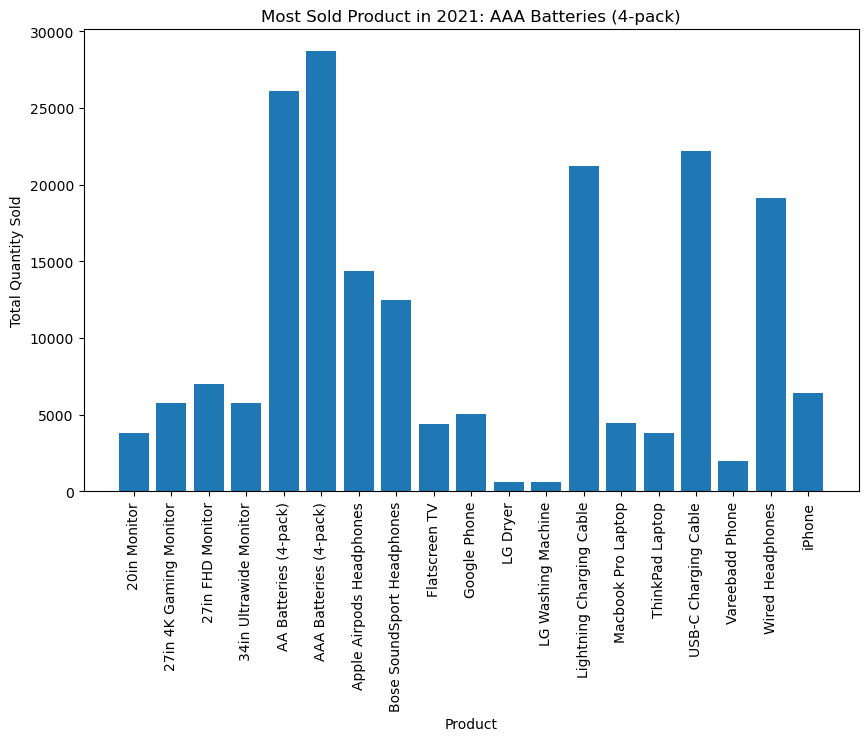

In [29]:
combined_df['Order Year'] = combined_df['Order Date'].dt.year

# Filter data for the year 2021
data_2021 = combined_df[combined_df['Order Year'] == 2021]

# Calculate total quantity sold per product in 2021
product_sales_2021 = data_2021.groupby('Product')['Quantity Ordered'].sum()

# Find the most sold product
most_sold_product_2021 = product_sales_2021.idxmax()

# Create a bar chart to visualize the most sold product
plt.figure(figsize=(10, 6))
plt.bar(product_sales_2021.index, product_sales_2021.values)
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title(f'Most Sold Product in 2021: {most_sold_product_2021}')
plt.xticks(rotation=90)
plt.show()

#from the figure above we notice that the most selled product in 2021 is AAA Bateries(4-pack)

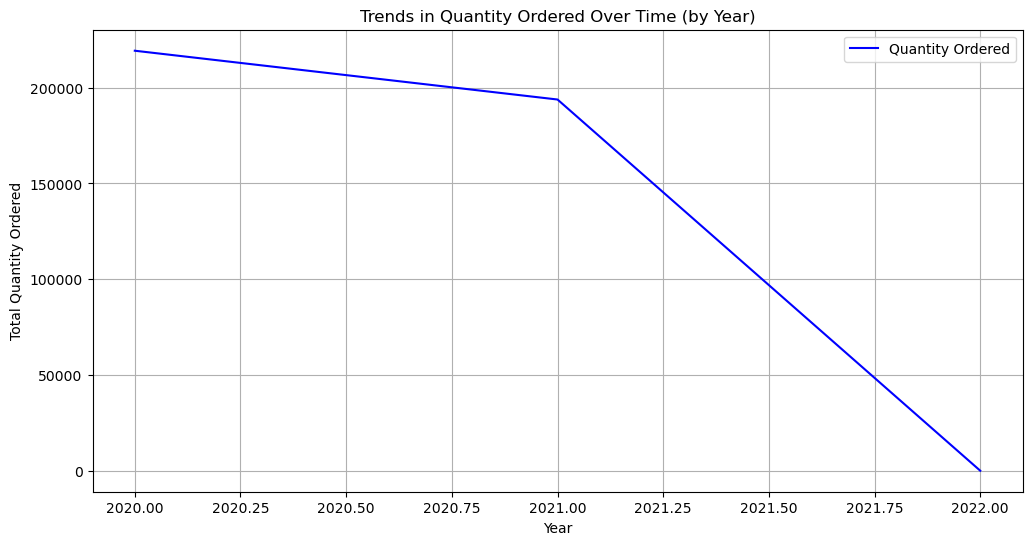

In [30]:
plt.figure(figsize=(12, 6))

data_resampled = combined_df.set_index('Order Date')['Quantity Ordered'].resample('Y').sum()

plt.plot(data_resampled.index.year, data_resampled, label='Quantity Ordered', color='b')
plt.title('Trends in Quantity Ordered Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.legend()

plt.show()

##The figure above illustrates the trend in quantity ordered over time, organized by year quarters.Notably, we observe a consistent decline in product sales that commences in the first quarter of the year 2021 and extends through subsequent quarters. This sustained decrease in sales from Q1 2021 onwards highlights an important shift in product demand and sales patterns

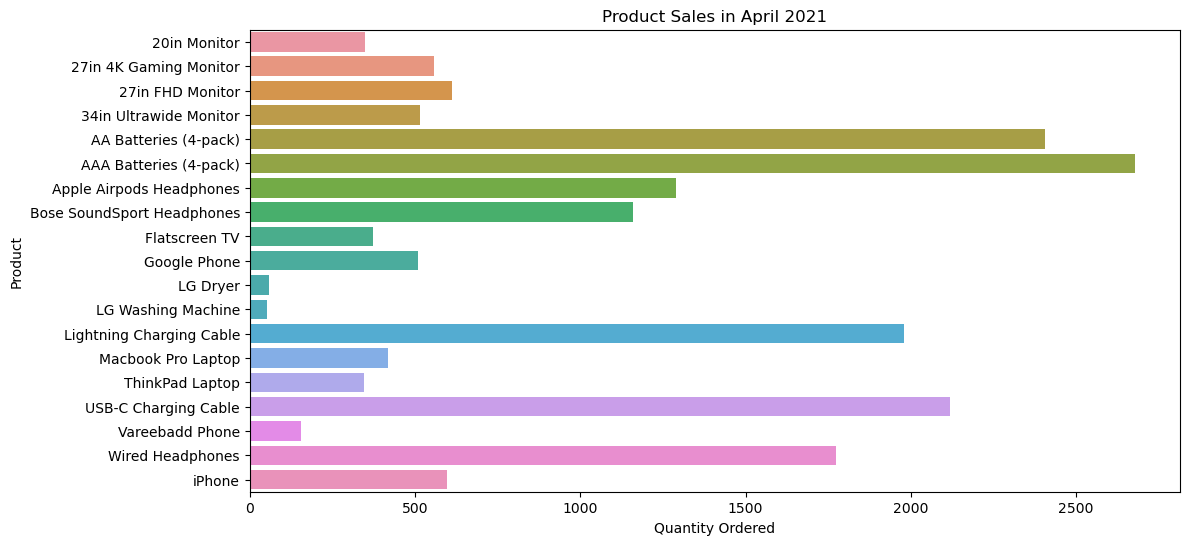

In [31]:
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])

# Filter data for April 2021
april_2021_data = combined_df[(combined_df['Order Date'].dt.year == 2021) & (combined_df['Order Date'].dt.month == 4)]

product_sales = april_2021_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity Ordered', y='Product', data=product_sales)
plt.title('Product Sales in April 2021')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


#The figure above represents the most selled products in April 2021, and we can notice that the Batteries are the most selled products

#As SQL Query

# Machine Learning Model


'''
I want to build a machine learning model that will predict the values of the column (Quantity Ordered) in the future
'''

# Import the Libraries

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Label Encoder to convert all the features to numeric values

In [33]:
label_enc=LabelEncoder()
cat_col=combined_df.select_dtypes(['object']).columns
combined_df[cat_col]=combined_df[cat_col].apply(LabelEncoder().fit_transform)
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Year
0,171654,15,1,11.95,2020-04-22 22:27:00,173883,2020
1,171655,17,2,11.99,2020-04-02 15:14:00,105329,2020
2,171656,7,1,99.99,2020-04-30 20:09:00,96887,2020
3,171657,17,1,11.99,2020-04-05 00:23:00,101699,2020
4,171658,5,2,2.99,2020-04-07 10:36:00,215885,2020


In [34]:
combined_df.drop('Order Date', axis=1, inplace=True)


I needed to drop this column, as its dtype is datetime and it is causing problems with the used machine learning algorithm

# Applying the Random Forest and Linear Regression Regressors

I used the Regression instead of the classsification as the feature I want to predict is numeric

In [36]:
# Define the regressors
random_forest_regressor = RandomForestRegressor(n_estimators=50, random_state=20)
linear_regressor = LinearRegression()

# Initialize SelectKBest feature selector
selector = SelectKBest(f_regression, k=5)

# Fit the feature selector and transform X
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Initialize the regressors
regressors = {
    'Random Forest': random_forest_regressor,
    'Linear Regression': linear_regressor,
}

result = pd.DataFrame(columns=['Regressor', 'MSE', 'MAE', 'R2 Score'])

for regressor_name, regressor in regressors.items():
    regressor.fit(X_train_selected, y_train)
    y_pred = regressor.predict(X_test_selected)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    result.loc[len(result)] = [regressor_name, mse, mae, r2]

print("Regression Metrics:")
print(result)

Regression Metrics:
           Regressor       MSE       MAE  R2 Score
0      Random Forest  0.198298  0.196581  0.030494
1  Linear Regression  0.197820  0.236978  0.032830


In the comparison of the Random Forest and Linear Regression regression techniques, Linear Regression slightly outperforms Random Forest in terms of two key metrics. Specifically, it achieves a slightly lower Mean Squared Error (MSE), indicating better performance in minimizing the squared differences between predicted and actual values, and a slightly higher R-squared (R2) score, which suggests it explains a bit more of the variance in the target variable. However, it's essential to consider that the differences in performance between the two models are relatively small, and the choice between them may also depend on other factors such as model interpretability and computational resources.

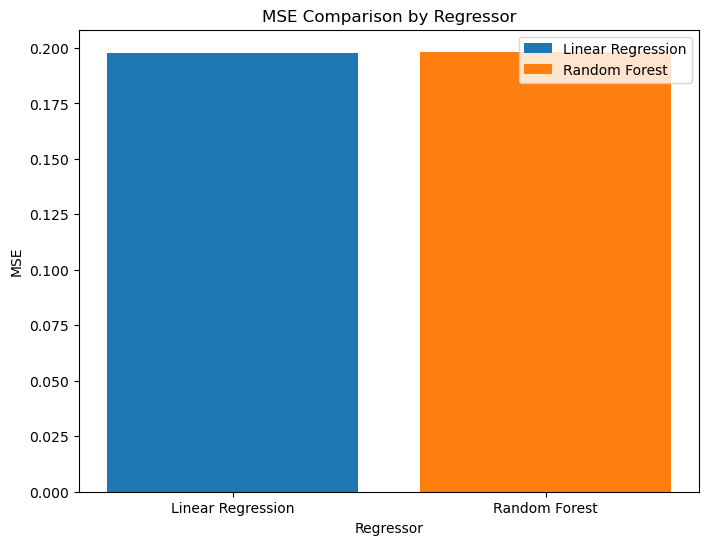

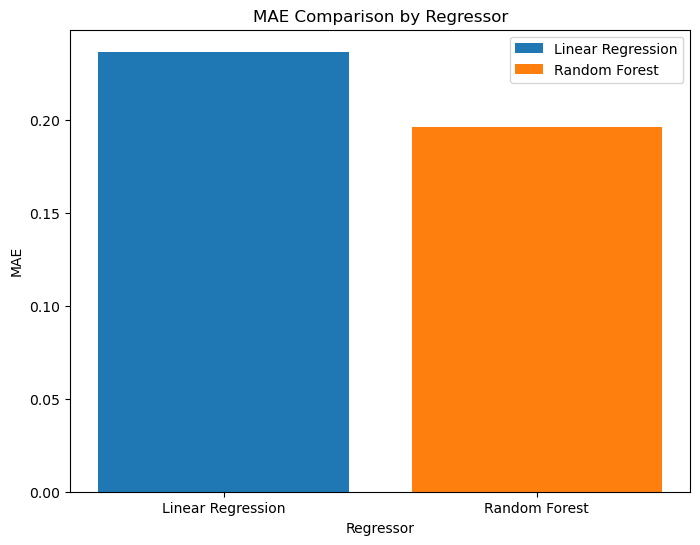

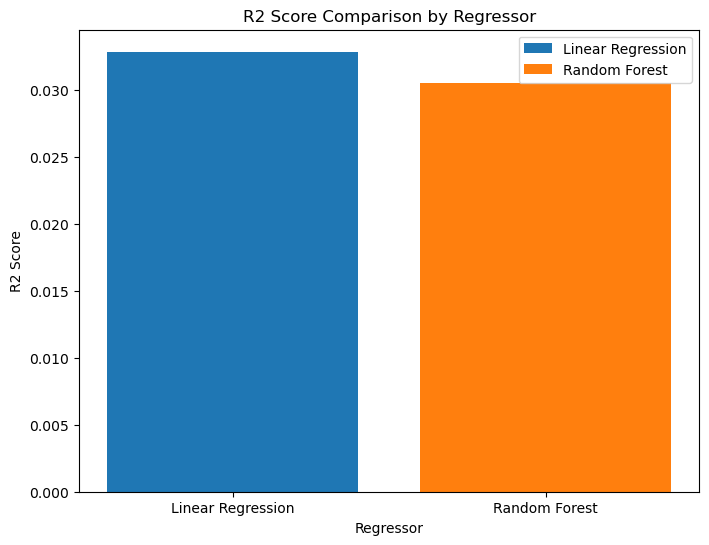

In [45]:

# Group the results by regressor
grouped_result = result.groupby('Regressor')

# Define the metrics you want to compare
metrics = ['MSE', 'MAE', 'R2 Score']

# Create a bar chart for each metric
for metric in metrics:
    plt.figure(figsize=(8, 6))
    for regressor_name, regressor_group in grouped_result:
        plt.bar(regressor_name, regressor_group[metric], label=regressor_name)
    plt.xlabel('Regressor')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison by Regressor')
    plt.legend()
    plt.show()
